## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [5]:
df = pd.read_csv('CC GENERAL.csv')

In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df = df.fillna(0)

In [11]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
df = pd.get_dummies(df)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

Text(0, 0.5, ' Sum of Squared Distances')

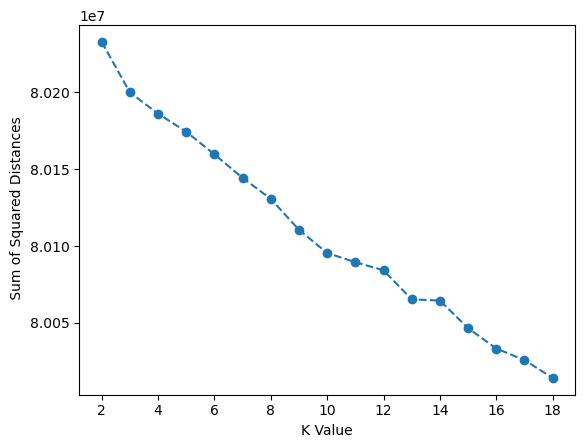

In [55]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
cluster_labels = model.fit_predict(scaled_df)

ssd = []

for k in range(2,19):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_df)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
plt.plot(range(2,19),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

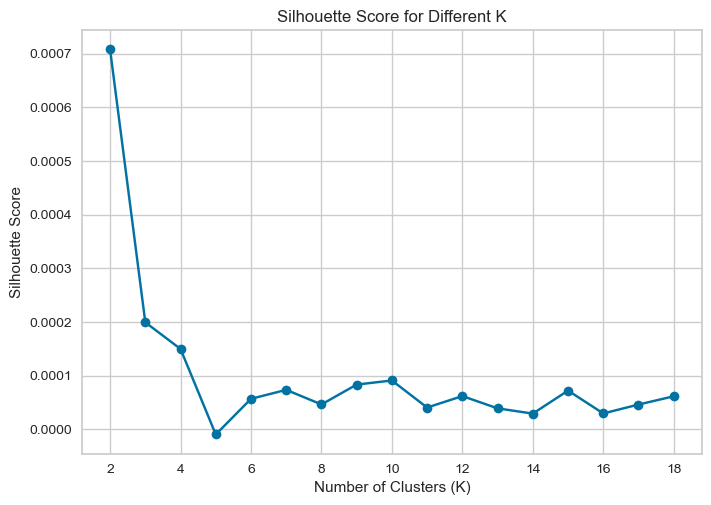

In [109]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sil_scores = []
K_range = range(2, 19)  

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    sil_scores.append(score)

# Plot Silhouette Scores for Different K
plt.plot(K_range, sil_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()

Choose the optimal K and calculate the silhouette score for the best model.

In [23]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df)

print('Silhoutte score of our model is ' + str(silhouette_score(scaled_df, kmeans.labels_)))

Silhoutte score of our model is 0.0004389550862538074


## Agglomerative Clustering

Find the optimal agglomerative clustering model.

2
3
4
5


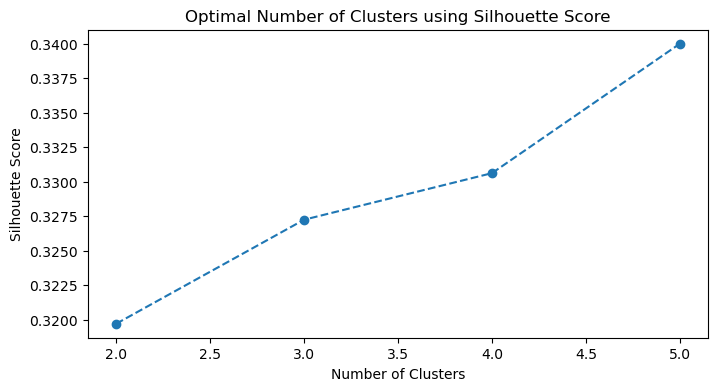

Optimal Number of Clusters: 5


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

cluster_range = range(2, 6)
sil_scores = []
for k in cluster_range:
    print(k)
    agglo = AgglomerativeClustering(n_clusters=k, linkage="ward")  
    labels = agglo.fit_predict(df) 
    score = silhouette_score(df, labels) 
    sil_scores.append(score)
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, sil_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal Number of Clusters using Silhouette Score")
plt.show()

# Find the best cluster number
optimal_clusters = cluster_range[np.argmax(sil_scores)]
print(f"Optimal Number of Clusters: {optimal_clusters}")

Choose the optimal K and calculate the silhouette score for the best model.

In [32]:
model = AgglomerativeClustering(n_clusters=5, linkage="ward")
cluster_labels = model.fit_predict(df)
silhouette_score(df, cluster_labels)

0.3399839295637355

## DBSCAN

Find the optimal DBSCAN model.

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

min_samples = range(10, 15)
eps = np.arange(0.05, 0.1, 0.01)
output = []

for ms in min_samples:
    for ep in eps:
        db = DBSCAN(min_samples=ms, eps=ep)
        labels = db.fit(scaled_df).labels_
        # Check if there are at least 2 valid clusters (excluding noise)
        unique_labels = set(labels) - {-1}
        if len(unique_labels) < 2:
            continue  # Skip invalid clustering
        try:
            score = silhouette_score(scaled_df, labels)
            output.append((ms, ep, score))
        except ValueError:
            continue  # Handle edge cases gracefully

# Proceed only if valid results exist
if output:
    best = sorted(output, key=lambda x: x[-1])[-1]
    print(f"Best silhouette_score: {best[2]}")
    print(f"min_samples: {best[0]}")
    print(f"eps: {best[1]}")
else:
    print("No valid clusterings found.")

No valid clusterings found.


In [56]:
best_score = -1
best_params = None

for eps in np.arange(0.1, 1.0, 0.1):  # Increase eps range
    for min_samples in range(3, 10):  # Reduce min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_df)
        
        # Ensure at least 2 clusters exist
        if len(set(labels)) > 1 and -1 in labels:
            score = silhouette_score(scaled_df, labels)
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

if best_params:
    print(f"Best Silhouette Score: {best_score:.4f}")
    print(f"Best Parameters - eps: {best_params[0]}, min_samples: {best_params[1]}")
else:
    print("DBSCAN could not find valid clusters. Try adjusting eps and min_samples.")

DBSCAN could not find valid clusters. Try adjusting eps and min_samples.


Find the parameters that optimize the performance of your model and calculate the silhouette score.

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?

In [69]:
## Agglomerative Clustering
## it produced the best clustering structure compared to the other models (DBSCAN failed, and the Kmeans model had a very lower score).

